In [138]:
import pandas as pd
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [140]:
house=pd.read_csv("train[1].csv")

In [142]:
house

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125


In [144]:
features=house[["GrLivArea","BedroomAbvGr","FullBath","HalfBath"]]

In [146]:
target=house["SalePrice"]

In [148]:
features=features.dropna()

In [150]:
x_train,x_test,y_train,y_test=train_test_split(features,target,test_size=0.2,random_state=42)

In [152]:
model=LinearRegression()
model.fit(x_train,y_train)

LinearRegression()

In [154]:
y_pred=model.predict(x_test)

In [156]:
x_test["pred"]=y_pred

In [158]:
x_test

,GrLivArea,BedroomAbvGr,FullBath,HalfBath,pred
892,1068,3,1,0,112217.017650
1105,2622,3,2,1,305769.106846
413,1028,2,1,0,134851.729688
522,1664,3,2,0,203697.655418
1036,1620,2,2,0,225925.437192
...,...,...,...,...,...
479,1131,2,1,0,145330.183979
1361,1530,3,2,0,190065.491583
802,1456,3,2,1,187148.934967
651,1510,4,1,0,130478.797117


In [160]:
x_test["pred"]=x_test["pred"].round()

In [162]:
x_test

,GrLivArea,BedroomAbvGr,FullBath,HalfBath,pred
892,1068,3,1,0,112217.0
1105,2622,3,2,1,305769.0
413,1028,2,1,0,134852.0
522,1664,3,2,0,203698.0
1036,1620,2,2,0,225925.0
...,...,...,...,...,...
479,1131,2,1,0,145330.0
1361,1530,3,2,0,190065.0
802,1456,3,2,1,187149.0
651,1510,4,1,0,130479.0


In [165]:
mse=mean_squared_error(y_test,y_pred)

In [84]:
print("the mean squared error is:",mse.round())

the mean squared error is: 2810942965.0


In [86]:
import matplotlib.pyplot as plt

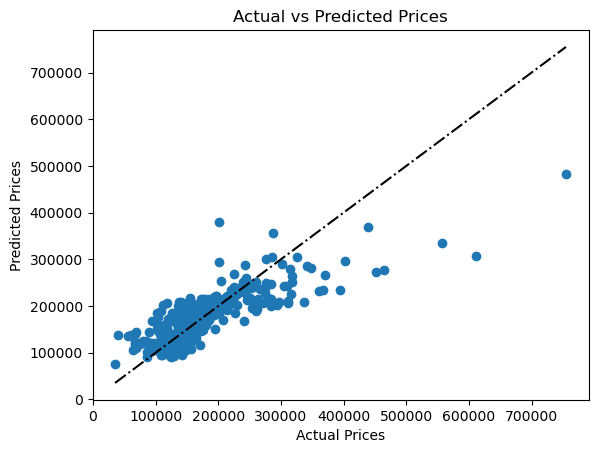

In [168]:
plt.scatter(y_test,y_pred)
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual vs Predicted Prices")
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='black', linestyle='-.')
plt.show()
